# Week 4 (Week 8). Assignment 1.

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).


Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.


С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.


Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn import tree, cross_validation, ensemble


def save_file(file_name, data):
    with open(file_name, 'wt') as f:
        f.write(data)

## Task 1

1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте *качество его работы* с помощью cross_val_score. Эта величина и будет *ответом в пункте 1*.

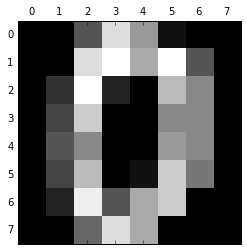

In [3]:
digits = load_digits()

plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [4]:
decision_tree_classifier = tree.DecisionTreeClassifier()

scores = cross_validation.cross_val_score(
    decision_tree_classifier,
    digits.data, digits.target, cv=10)
mean_score = scores.mean()

print u'Scores for K-Fold(10) =', scores
print u'Mean score = ', mean_score

save_file('w4_a1_t1.txt', str(mean_score))

Scores for K-Fold(10) = [ 0.80540541  0.85245902  0.85082873  0.80555556  0.77653631  0.90502793
  0.86592179  0.8258427   0.84180791  0.83522727]
Mean score =  0.836461261912


## Task 2

2. Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. *Качество классификации новой модели - ответ в пункте 2*. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [5]:
bagging_classifier = ensemble.BaggingClassifier(
    decision_tree_classifier,
    n_estimators=100)

scores = cross_validation.cross_val_score(
    bagging_classifier,
    digits.data, digits.target, cv=10)
mean_score = scores.mean()

print u'Scores for K-Fold(10) =', scores
print u'Mean score =', mean_score

save_file('w4_a1_t2.txt', str(mean_score))

Scores for K-Fold(10) = [ 0.88108108  0.95628415  0.91160221  0.93333333  0.92178771  1.
  0.96648045  0.91573034  0.87570621  0.9375    ]
Mean score = 0.929950548556


## Task 3

3. Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt(d)$ случайных признаков. *Качество* работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [6]:
bagging_classifier2 = ensemble.BaggingClassifier(
    decision_tree_classifier,
    n_estimators=100,
    max_features=int(np.sqrt(digits.data.shape[1])))

scores = cross_validation.cross_val_score(
    bagging_classifier2,
    digits.data, digits.target, cv=10)
mean_score = scores.mean()

print u'Scores for K-Fold(10) =', scores
print u'Mean score =', mean_score

save_file('w4_a1_t3.txt', str(mean_score))

Scores for K-Fold(10) = [ 0.89189189  0.94535519  0.93370166  0.9         0.9273743   0.94972067
  0.96089385  0.98314607  0.88700565  0.91477273]
Mean score = 0.929386201183


## Task 4

4. Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [7]:
decision_tree_classifier2 = tree.DecisionTreeClassifier(max_features='sqrt')

bagging_classifier3 = ensemble.BaggingClassifier(
    decision_tree_classifier2,
    n_estimators=100)

scores = cross_validation.cross_val_score(
    bagging_classifier3,
    digits.data, digits.target, cv=10)
mean_score = scores.mean()

print u'Scores for K-Fold(10) =', scores
print u'Mean score =', mean_score

save_file('w4_a1_t4.txt', str(mean_score))

Scores for K-Fold(10) = [ 0.9027027   0.96721311  0.93922652  0.97222222  0.95530726  0.97206704
  0.97206704  0.96629213  0.92655367  0.94886364]
Mean score = 0.952251534331


## Task 5

5. Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. На основе наблюдений *выпишите через пробел номера правильных утверждений* из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)


* 1) Случайный лес сильно переобучается с ростом количества деревьев
* 2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
* 3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
* 4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
* 5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
* 6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
* 7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [8]:
random_forest = ensemble.RandomForestClassifier(n_estimators=100, max_features='sqrt')

scores = cross_validation.cross_val_score(
    random_forest,
    digits.data, digits.target, cv=10)

print u'Scores for K-Fold(10) =', scores
print u'Mean score =', scores.mean()

Scores for K-Fold(10) = [ 0.9027027   0.97814208  0.94475138  0.94444444  0.96089385  0.97206704
  0.97765363  0.97752809  0.95480226  0.94886364]
Mean score = 0.956184911614


Ответ: 2,3,4,7

In [9]:
save_file('w4_a1_t5.txt', '2 3 4 7')